#Questions NO 1:-
##1) Delivery_time -> Predict delivery time using sorting time 

------------------------------------------------------------

###Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [ ]:
# Question:-Delivery_time -> Predict delivery time using sorting time


In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smf
import statsmodels.formula.api as sm
import warnings
warnings.filterwarnings('ignore')

In [ ]:
delivery_time=pd.read_csv('/content/delivery_time.csv')

In [ ]:
delivery_time.head()


,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


#Renaming Column Name by performing EDA

In [ ]:
delivery_time=delivery_time.rename({'Delivery Time':'Delivery_Time', 'Sorting Time':'Sorting_Time'},axis=1)
delivery_time.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [ ]:
delivery_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [ ]:
delivery_time.describe()

,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


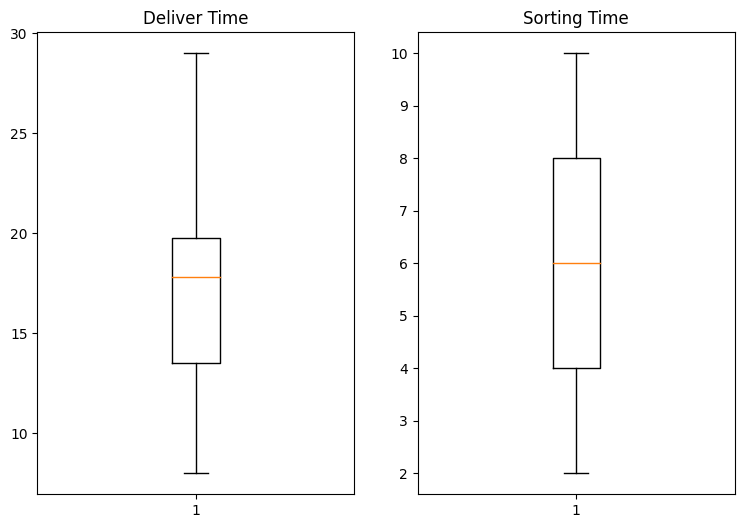

In [ ]:
# Plotting Boxplot to check the outliers
plt.subplots(figsize=(9,6))
plt.subplot(121)
plt.boxplot(delivery_time['Delivery_Time'])
plt.title('Deliver Time')
plt.subplot(122)
plt.boxplot(delivery_time['Sorting_Time'])
plt.title('Sorting Time')
plt.show()

In [ ]:
# Checking corelation between two varibles
delivery_time.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


<Axes: xlabel='Sorting_Time', ylabel='Delivery_Time'>

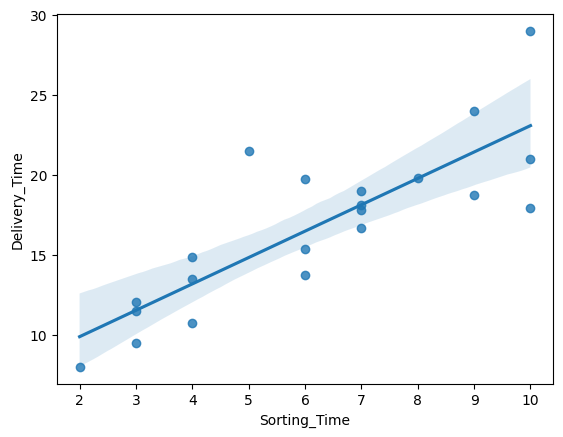

In [ ]:
sns.regplot(x=delivery_time['Sorting_Time'],y=delivery_time['Delivery_Time'])

####As per the Above Graph  
*  There is strong corelation between the delivery time and sorting time
*  The corelaation between two variables is more than 0.8 which is good sign






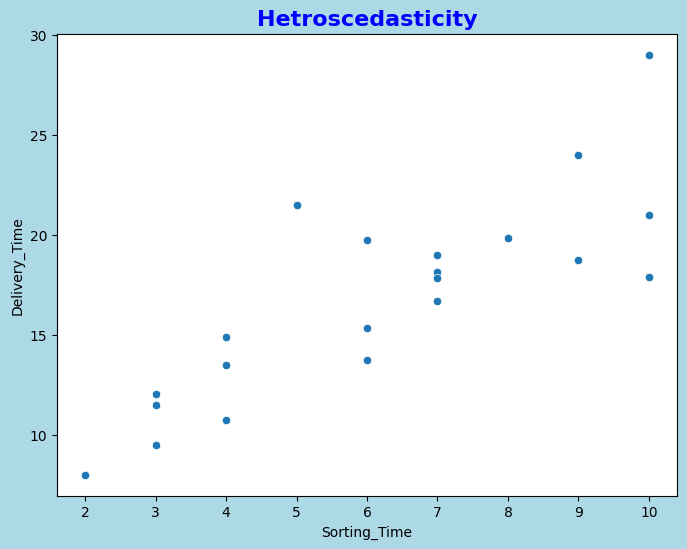

In [ ]:
# Checking for Homoscedasticity or Hetroscedasticity
plt.figure(figsize=(8,6),facecolor='lightblue')
sns.scatterplot(x=delivery_time['Sorting_Time'],y=delivery_time['Delivery_Time'])
plt.title('Hetroscedasticity',fontweight='bold',color='blue',fontsize=16)
plt.show()

In [ ]:
delivery_time.var()

Delivery_Time    25.754619
Sorting_Time      6.461905
dtype: float64

###As per the above Graph


*   As sorting time is increases the delivery time is also increases along the way
*   The data does not specify any pattern but we can not say the variation is Homoscedasticity

<Axes: xlabel='Delivery_Time', ylabel='Density'>

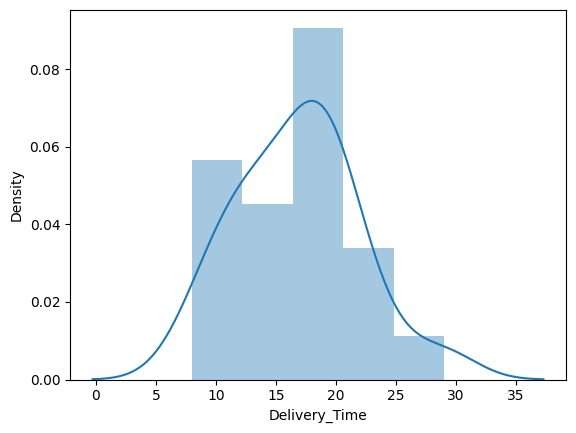

In [ ]:
sns.distplot(delivery_time['Delivery_Time'])

<Axes: xlabel='Sorting_Time', ylabel='Density'>

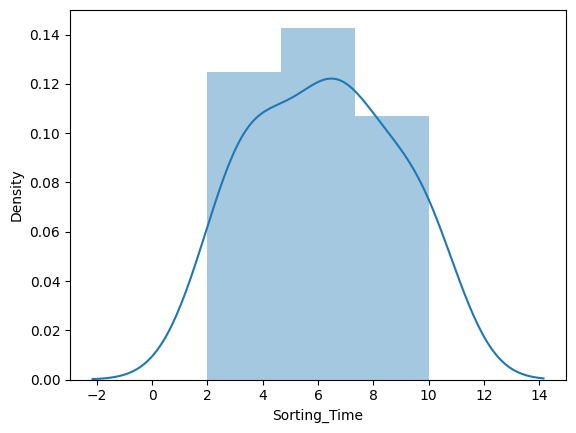

In [ ]:
sns.distplot(delivery_time['Sorting_Time'])

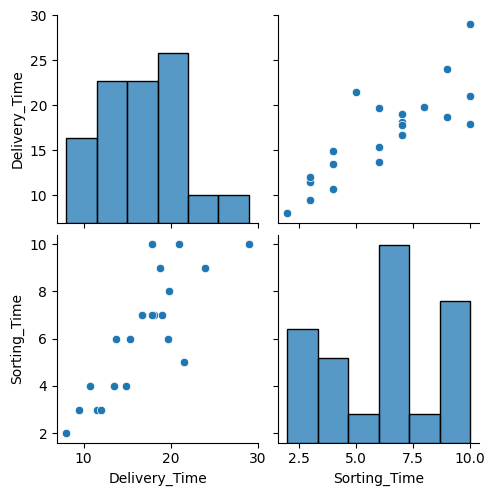

In [ ]:
sns.pairplot(delivery_time)

#Model Building

In [ ]:
import statsmodels.formula.api as smf
model=smf.ols('Delivery_Time~Sorting_Time',data=delivery_time).fit()

In [ ]:
print(model.params,'\n''\n',model.tvalues,'\n''\n',model.pvalues)

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64 

 Intercept       3.823349
Sorting_Time    6.387447
dtype: float64 

 Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


In [ ]:
# Finding RSquared Value
model.rsquared,model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 27 May 2023   Prob (F-statistic):           3.98e-06
Time:                        13:53:02   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
log_model=smf.ols('np.log(Delivery_Time)~np.log(Sorting_Time)',data=delivery_time).fit()  #Using Log

In [ ]:
print(log_model.params,'\n''\n',log_model.tvalues,'\n''\n',log_model.pvalues)

Intercept               1.741987
np.log(Sorting_Time)    0.597522
dtype: float64 

 Intercept               13.085552
np.log(Sorting_Time)     8.024484
dtype: float64 

 Intercept               5.921137e-11
np.log(Sorting_Time)    1.601539e-07
dtype: float64


In [ ]:
# Finding RSquared Value
log_model.rsquared,log_model.rsquared_adj

(0.77216134926874, 0.7601698413355158)

In [ ]:
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Sat, 27 May 2023   Prob (F-statistic):           1.60e-07
Time:                           14:22:59   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(Sorting_Time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##Model Testing

In [ ]:
# finding Coefficient parameters
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [ ]:
# finding tvalues and pvalues
model.tvalues,model.pvalues

(Intercept       3.823349
 Sorting_Time    6.387447
 dtype: float64,
 Intercept       0.001147
 Sorting_Time    0.000004
 dtype: float64)

In [ ]:
# finding Rsquared value
model.rsquared,model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

##Predicted values from model with log transformation of data

In [ ]:
predicted = pd.DataFrame()
predicted['Sorting_Time'] = delivery_time.Sorting_Time
predicted['Delivery_Time'] = delivery_time.Delivery_Time
predicted['Predicted_Delivery_Time'] = pd.DataFrame(np.exp(log_model.predict(predicted.Sorting_Time)))
predicted


##Predicted values Given model without transformation of data

In [ ]:
predicted1=pd.DataFrame()
predicted1['Sorting_Time']=delivery_time.Sorting_Time
predicted1['Delivery_Time']=delivery_time.Delivery_Time
predicted1['Predicted_Delivery_Time']=pd.DataFrame(model.predict(predicted1.Sorting_Time))
predicted1

,Sorting_Time,Delivery_Time,Predicted_Delivery_Time
0,10,21.00,23.072933
1,4,13.50,13.178814
2,6,19.75,16.476853
3,9,24.00,21.423913
4,10,29.00,23.072933
5,6,15.35,16.476853
6,7,19.00,18.125873
7,3,9.50,11.529794
8,10,17.90,23.072933
9,9,18.75,21.423913
